In [12]:
import pandas as pd

# Tải tập dữ liệu
Ames = pd.read_csv('Ames.csv')
# Xác định các tứ phân vị
quantiles = Ames['SalePrice'].quantile([0.25, 0.5, 0.75])
# Hàm phân loại từng hàng theo giá bán
def categorize_by_price(row):
    if row['SalePrice'] <= quantiles.iloc[0]:
        return 'Thấp'
    elif row['SalePrice'] <= quantiles.iloc[1]:
        return 'Trung bình'
    elif row['SalePrice'] <= quantiles.iloc[2]:
        return 'Cao'
    else:
        return 'Cao cấp'
# Áp dụng hàm để tạo một cột mới
Ames['Price_Category'] = Ames.apply(categorize_by_price, axis=1)
# Hiển thị cột Giá bán và Phân loại giá
print(Ames[['SalePrice','Price_Category']])

      SalePrice Price_Category
0        126000           Thấp
1        139500     Trung bình
2        124900           Thấp
3        114000           Thấp
4        227000        Cao cấp
...         ...            ...
2574     121000           Thấp
2575     139600     Trung bình
2576     145000     Trung bình
2577     217500        Cao cấp
2578     215000        Cao cấp

[2579 rows x 2 columns]


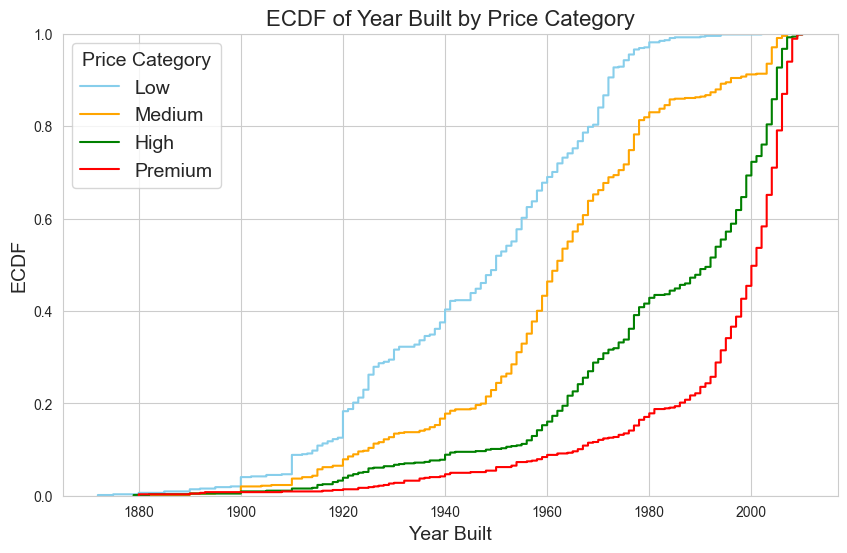

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hàm phân loại từng hàng theo giá bán
def categorize_by_price(row):
    if row['SalePrice'] <= quantiles.iloc[0]:
        return 'Low'
    elif row['SalePrice'] <= quantiles.iloc[1]:
        return 'Medium'
    elif row['SalePrice'] <= quantiles.iloc[2]:
        return 'High'
    else:
        return 'Premium'
    
# Đọc tập dữ liệu
Ames = pd.read_csv('Ames.csv')

# Xác định các tứ phân vị của giá bán
quantiles = Ames['SalePrice'].quantile([0.25, 0.5, 0.75])

# Áp dụng phân loại giá cho từng dòng trong tập dữ liệu
Ames['Price_Category'] = Ames.apply(categorize_by_price, axis=1)

# Chia tập dữ liệu ban đầu thành 4 DataFrame theo danh mục giá
low_priced_homes = Ames.query('Price_Category == "Low"') # Nhà giá thấp
medium_priced_homes = Ames.query('Price_Category == "Medium"') # Nhà giá trung bình
high_priced_homes = Ames.query('Price_Category == "High"') # Nhà giá cao
premium_priced_homes = Ames.query('Price_Category == "Premium"') # Nhà cao cấp

# Thiết lập kiểu hiển thị đồ thị cho giao diện thẩm mỹ
sns.set_style("whitegrid")

# Tạo một hình vẽ
plt.figure(figsize=(10, 6))
# Vẽ biểu đồ ECDF cho từng danh mục giá trên cùng một hình
sns.ecdfplot(data=low_priced_homes, x='YearBuilt', color='skyblue', label='Low')
sns.ecdfplot(data=medium_priced_homes, x='YearBuilt', color='orange', label='Medium')
sns.ecdfplot(data=high_priced_homes, x='YearBuilt', color='green', label='High')
sns.ecdfplot(data=premium_priced_homes, x='YearBuilt', color='red', label='Premium')

# Thêm tiêu đề và nhãn trục để làm rõ nội dung biểu đồ
plt.title('ECDF of Year Built by Price Category', fontsize=16)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('ECDF', fontsize=14)
plt.legend(title='Price Category', title_fontsize=14, fontsize=14)

# Hiển thị biểu đồ
plt.show()

In [19]:
# Ghép chồng các danh mục Giá thấp và Trung bình vào DataFrame "affordable_homes" (Nhà giá phải chăng)
affordable_homes = pd.concat([low_priced_homes, medium_priced_homes])
# Ghép chồng các danh mục Giá cao và Cao cấp vào DataFrame "luxury_homes" (Nhà sang trọng)
luxury_homes = pd.concat([high_priced_homes, premium_priced_homes])
print(affordable_homes)
print(luxury_homes)

            PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
0     909176150        856     126000          30       RL          NaN   
2     911128020       1001     124900          30  C (all)         60.0   
3     535377150       1039     114000          70       RL         80.0   
6     902135020        936      93000          20       RM         60.0   
12    902204080        861      80000          30       RM         62.0   
...         ...        ...        ...         ...      ...          ...   
2558  535179020       1580     159500          20       RL         80.0   
2563  535402220       1734     159000          50       RL         77.0   
2566  910200110       1215     141000          50       RM         50.0   
2575  905402060       1733     139600          20       RL          NaN   
2576  909275030       2002     145000          90       RH         82.0   

      LotArea Street Alley LotShape  ... MiscVal MoSold YrSold SaleType  \
0        7890   Pave   N

In [20]:
# Tạo pivot table với cả diện tích sinh hoạt trung bình và số lượng nhà
aggfunc = {'GrLivArea': 'mean', 'Fireplaces': 'count'}
pivot_affordable = affordable_homes.pivot_table(index='Fireplaces', aggfunc=aggfunc)
pivot_luxury = luxury_homes.pivot_table(index='Fireplaces', aggfunc=aggfunc)

# Đổi tên cột và nhãn chỉ mục riêng biệt
rename_rules = {'GrLivArea': 'AvLivArea', 'Fireplaces': 'HmCount'}
pivot_affordable.rename(columns=rename_rules, inplace=True)
pivot_affordable.index.name = 'Fire' # Đổi tên chỉ mục
pivot_luxury.rename(columns=rename_rules, inplace=True)
pivot_luxury.index.name = 'Fire' # Đổi tên chỉ mục

# Xem pivot table
print(pivot_affordable)
print(pivot_luxury)

      HmCount    AvLivArea
Fire                      
0         931  1159.050483
1         323  1296.808050
2          38  1379.947368
      HmCount    AvLivArea
Fire                      
0         310  1560.987097
1         808  1805.243812
2         157  1998.248408
3          11  2088.090909
4           1  2646.000000


In [21]:
# Tạo pivot table với chỉ mục là số lượng lò sưởi (Fireplaces)
# và cột là danh mục giá (Price_Category)
pivot = Ames.pivot_table(index="Fireplaces", # Chỉ mục: Số lượng lò sưởi
columns="Price_Category", # Cột: Danh mục giá nhà
aggfunc={'GrLivArea': 'mean', # Tính trung bình diện tích sinh hoạt
'Fireplaces': 'count'}) # Đếm số lượng nhà trong mỗi nhóm
# Hiển thị pivot table
print(pivot)

               Fireplaces                          GrLivArea               \
Price_Category       High    Low Medium Premium         High          Low   
Fireplaces                                                                  
0                   228.0  520.0  411.0    82.0  1511.912281  1081.496154   
1                   357.0  116.0  207.0   451.0  1580.644258  1184.112069   
2                    52.0    9.0   29.0   105.0  1627.384615  1184.888889   
3                     5.0    NaN    NaN     6.0  1834.600000          NaN   
4                     NaN    NaN    NaN     1.0          NaN          NaN   

                                          
Price_Category       Medium      Premium  
Fireplaces                                
0               1257.172749  1697.439024  
1               1359.961353  1983.031042  
2               1440.482759  2181.914286  
3                       NaN  2299.333333  
4                       NaN  2646.000000  


In [22]:
# Thực hiện outer join để kết hợp dữ liệu từ hai pivot table của nhà giá phải chăng và sang trọng
# Ghép nối dựa trên cột 'Fire' (số lượng lò sưởi), giữ lại tất cả giá trị từ cả hai bảng
# Thêm hậu tố '_aff' cho dữ liệu từ pivot_affordable và '_lux' cho dữ liệu từ pivot_lux
# Điền giá trị NaN bằng 0 để đảm bảo dữ liệu đầy đủ
pivot_outer_join = pd.merge(pivot_affordable, pivot_luxury, on='Fire', how='outer',

suffixes=('_aff', '_lux')).fillna(0)

# In kết quả của outer join
print(pivot_outer_join)

      HmCount_aff  AvLivArea_aff  HmCount_lux  AvLivArea_lux
Fire                                                        
0           931.0    1159.050483          310    1560.987097
1           323.0    1296.808050          808    1805.243812
2            38.0    1379.947368          157    1998.248408
3             0.0       0.000000           11    2088.090909
4             0.0       0.000000            1    2646.000000


In [23]:
# Thực hiện inner join để kết hợp dữ liệu từ hai pivot table của nhà giá phải chăng và sang trọng
# Chỉ giữ lại các hàng có số lượng lò sưởi ('Fire') xuất hiện trong cả hai bảng
# Thêm hậu tố '_aff' cho dữ liệu từ pivot_affordable và '_lux' cho dữ liệu từ pivot_lux
pivot_inner_join = pd.merge(pivot_affordable, pivot_luxury, on='Fire', how='inner',

suffixes=('_aff', '_lux'))

# In kết quả của inner join
print(pivot_inner_join)

      HmCount_aff  AvLivArea_aff  HmCount_lux  AvLivArea_lux
Fire                                                        
0             931    1159.050483          310    1560.987097
1             323    1296.808050          808    1805.243812
2              38    1379.947368          157    1998.248408


In [ ]:
# Tạo pivot table với diện tích sinh hoạt trung bình và số lượng nhà theo số lượng lò sưởi
aggfunc = {'GrLivArea': 'mean', 'Fireplaces': 'count'}
pivot_affordable = affordable_homes.pivot_table(index='Fireplaces', aggfunc=aggfunc)
pivot_luxury = luxury_homes.pivot_table(index='Fireplaces', aggfunc=aggfunc)
# Đổi tên cột và chỉ mục
rename_rules = {'GrLivArea': 'AvLivArea', 'Fireplaces': 'HmCount'}
pivot_affordable.rename(columns=rename_rules, inplace=True)
pivot_affordable.index.name = 'Fire'
pivot_luxury.rename(columns=rename_rules, inplace=True)
pivot_luxury.index.name = 'Fire'
# Đặt lại chỉ mục để thực hiện cross join
pivot_affordable.reset_index(inplace=True)
pivot_luxury.reset_index(inplace=True)
# Thực hiện cross join để tạo tất cả các kết hợp có thể giữa hai bảng
pivot_cross_join = pd.merge(pivot_affordable, pivot_luxury, how='cross',
    suffixes=('_aff', '_lux')).round(2)

# In kết quả của cross join
print(pivot_cross_join)